In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [ ]:
from google.colab import files
uploaded=files.upload()
from google.colab import files
uploaded=files.upload()
from google.colab import files
uploaded=files.upload()
from google.colab import files
uploaded=files.upload()
from google.colab import files
uploaded=files.upload()


Saving women-political-empowerment-index.csv to women-political-empowerment-index (2).csv


Saving human-development-index.csv to human-development-index (2).csv


Saving average-years-of-schooling.csv to average-years-of-schooling (2).csv


Saving World Happiness Report.csv to World Happiness Report (2).csv


Saving women-political-participation-index.csv to women-political-participation-index (2).csv


In [ ]:
# Load datasets
df_participation = pd.read_csv("women-political-participation-index.csv")
df_empowerment = pd.read_csv("women-political-empowerment-index.csv")
df_happiness = pd.read_csv("World Happiness Report.csv")
df_schooling = pd.read_csv("average-years-of-schooling.csv")
df_hdi = pd.read_csv("human-development-index.csv")

In [ ]:
# Cleaning Function for Standard Format
def clean_dataset(df, value_column, new_value_name, year_limit=1990):
    df = df.copy()

    # Rename value column and "Entity"/"Country Name" column
    df.rename(columns={
        value_column: new_value_name,
        "Entity": "Country",
        "Country Name": "Country"  # for World Happiness
    }, inplace=True)

    # Drop non-numeric or missing values
    df = df[pd.to_numeric(df[new_value_name], errors='coerce').notnull()]
    df[new_value_name] = pd.to_numeric(df[new_value_name])

    # Clean year
    df["Year"] = pd.to_numeric(df["Year"], errors='coerce')
    df = df[df["Year"] >= year_limit]

    # Keep only needed columns
    return df[["Country", "Year", new_value_name]]

# Apply cleaning to each dataset
df_participation_clean = clean_dataset(df_participation,
    "Women's political participation index (central estimate, aggregate: average)", "Participation_Index")

df_empowerment_clean = clean_dataset(df_empowerment,
    "Women's political empowerment index (central estimate, aggregate: average)", "Empowerment_Index")

# Clean schooling and HDI
df_schooling_clean = clean_dataset(df_schooling, "Average years of schooling", "Avg_Schooling")
df_hdi_clean = clean_dataset(df_hdi, "Human Development Index", "HDI")

# Special case: happiness dataset (multiple columns)
df_happiness.rename(columns={
    "Country Name": "Country",
    "Log GDP Per Capita": "GDP",
    "Social Support": "Support",
    "Healthy Life Expectancy At Birth": "Life_Expectancy",
    "Freedom To Make Life Choices": "Freedom",
    "Perceptions Of Corruption": "Corruption",
    "Confidence In National Government": "Gov_Trust"
}, inplace=True)

relevant_cols = ["Country", "Year", "GDP", "Support", "Life_Expectancy", "Freedom", "Corruption", "Gov_Trust"]
df_happiness_clean = df_happiness[relevant_cols].dropna()

# Convert numeric columns
num_cols = ["GDP", "Support", "Life_Expectancy", "Freedom", "Corruption", "Gov_Trust"]
df_happiness_clean[num_cols] = df_happiness_clean[num_cols].apply(pd.to_numeric, errors='coerce')
df_happiness_clean = df_happiness_clean[df_happiness_clean["Year"] >= 1900]

I know that, it is not good to use the raw data as it is. So that, to prepare the datasets for analysis, I used a standardized cleaning function and applied across all datasets. This function first unified inconsistent columns names such as "Entity" or "Country name" into a standard "Country" label and renamed the selected value column to a consistnet name. It then handled missing and non-numeric values by assigning to NaN and converted all relevant columns to numeric types. Only rows from 1990 onward were retained to focus on more recent data. For each dataset, only the essential columns were preserved. This process ensured that all datasets shared a uniform structure, enabling them to be accuretly merged and compared in merging.

In [ ]:
# Step 3.1: Merge Empowerment and Participation Index
merged_df = pd.merge(df_empowerment_clean, df_participation_clean, on=["Country", "Year"], how="inner")

# Step 3.2: Merge with Schooling
merged_df = pd.merge(merged_df, df_schooling_clean, on=["Country", "Year"], how="inner")

# Step 3.3: Merge with HDI
merged_df = pd.merge(merged_df, df_hdi_clean, on=["Country", "Year"], how="inner")

# Step 3.4: Merge with Happiness dataset
merged_df = pd.merge(merged_df, df_happiness_clean, on=["Country", "Year"], how="inner")

# Step 3.5: Optional – Check final shape and preview
print(merged_df.shape)
merged_df.head()


(1734, 12)


,Country,Year,Empowerment_Index,Participation_Index,Avg_Schooling,HDI,GDP,Support,Life_Expectancy,Freedom,Corruption,Gov_Trust
0,Afghanistan,2008,0.464,0.891,1.742754,0.431,7.350416,0.450662,50.500000,0.718114,0.881686,0.612072
1,Afghanistan,2009,0.465,0.891,1.816490,0.441,7.508646,0.552308,50.799999,0.678896,0.850035,0.611545
2,Afghanistan,2010,0.478,0.902,1.890226,0.449,7.613900,0.539075,51.099998,0.600127,0.706766,0.299357
3,Afghanistan,2011,0.478,0.902,1.937043,0.457,7.581259,0.521104,51.400002,0.495901,0.731109,0.307386
4,Afghanistan,2012,0.478,0.902,1.983860,0.467,7.660506,0.520637,51.700001,0.530935,0.775620,0.435440


After cleaning the individual datasets, they were merged step-by-step into a single unified dataframe using inner joins based on matching "Country" and "Year" values. This ensured that only country-year combinations present across all datasets were retained, resulting in a final merged dataframe with 1,734 observations and 12 variables, ready for analysis.



In [ ]:
merged_df.describe() #let us see the description of the data

,Year,Empowerment_Index,Participation_Index,Avg_Schooling,HDI,GDP,Support,Life_Expectancy,Freedom,Corruption,Gov_Trust
count,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000
mean,2013.734141,0.784384,0.866796,8.872697,0.722926,9.374511,0.815262,63.215603,0.750152,0.751298,0.483898
std,4.491991,0.140015,0.155480,3.435432,0.162081,1.157798,0.121753,7.202883,0.136803,0.186061,0.194884
min,2005.000000,0.046000,0.082000,0.976930,0.303000,5.526723,0.290184,6.720000,0.260069,0.035198,0.068769
25%,2010.000000,0.721000,0.814000,6.302422,0.590000,8.447404,0.750741,58.681250,0.659198,0.697029,0.329617
50%,2014.000000,0.811000,0.916000,9.553662,0.755000,9.528187,0.844275,65.070000,0.770664,0.808609,0.464834
75%,2018.000000,0.891000,0.979000,11.820883,0.863750,10.348414,0.910282,68.943748,0.859126,0.877351,0.620204
max,2021.000000,0.962000,1.000000,14.255940,0.965000,11.663788,0.987343,74.349998,0.985178,0.983276,0.993604


**Women's Political Empowerment Index**

Mean: 0.78

Range: 0.05 – 0.96

Explanation:
Most countries demonstrate moderate to high levels of political empowerment for women, with the median value at 0.81. However, the wide range of values across country-year pairs indicates that political empowerment for women has varied significantly over time and across countries.


**Women's Political Participation Index**

Mean: 0.87

Range: 0.08 – 1.00

Explanation:
Participation levels are generally high across the globe. While this suggests active inclusion of women in political processes, the gap between participation and empowerment indicates that presence alone may not translate to influence.

**Average Years of Schooling**

Mean: 8.87 years

Range: ~1 – 14.3 years

Explanation: The data reflects significant inequality in education. While some populations receive more than 14 years of schooling on average, others barely exceed 1 year. Education will be analyzed as a structural factor possibly affecting both empowerment and well-being.


**Human Development Index (HDI)**

Mean: 0.72

Range: 0.30 – 0.96

Explanation:
Most countries fall within the medium to high development range. HDI is expected to be an important control variable in later analyses, especially when modeling happiness or trust in governance.

GDP (Log Scale)

Mean: 9.37

Range: 5.53 – 11.66

Explanation:
There is a skewness toward higher-income countries, with a few wealthy nations significantly raising the global average. Since GDP influences well-being, it will be included in predictive models to isolate the effect of women's empowerment.

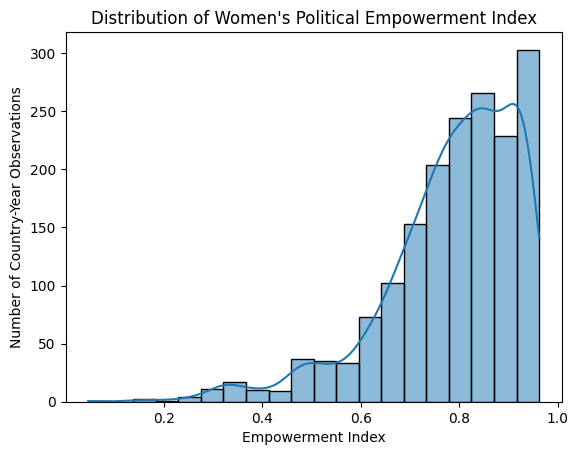

In [ ]:
sns.histplot(merged_df['Empowerment_Index'], kde=True, bins=20)
plt.title("Distribution of Women's Political Empowerment Index")
plt.xlabel("Empowerment Index")
plt.ylabel("Number of Country-Year Observations")
plt.show()


This distribution highlights a global trend toward greater women's political empowerment, although there are still outlier cases with low scores. In addition to that, most values are concentrated between 0.7 and 0.95, indicating that in many countries and years, women have had relatively high political empowerment.

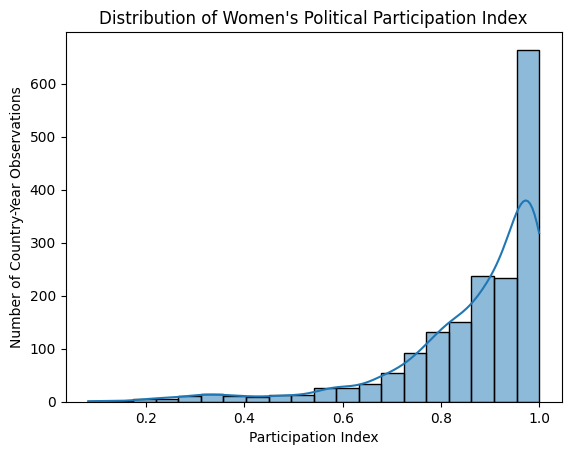

In [ ]:
sns.histplot(merged_df['Participation_Index'], kde=True, bins=20)
plt.title("Distribution of Women's Political Participation Index")
plt.xlabel("Participation Index")
plt.ylabel("Number of Country-Year Observations")
plt.show()


There is a strong right skew, with the majority of values clustering between 0.85 and 1.0. This suggests that in many cases, women are formally participating in political processes. Compared to the previous histogram on Empowerment Index, this distribution is more concentrated at the top end, implying that political participation is more widespread than true political empowerment. This makes me wonder: are women being included symbolically in politics while lacking the structural support and authority to drive change? I want to explore whether this discrepancy has an impact on national well-being indicators such as trust in government or perceived corruption in later parts of my analysis.

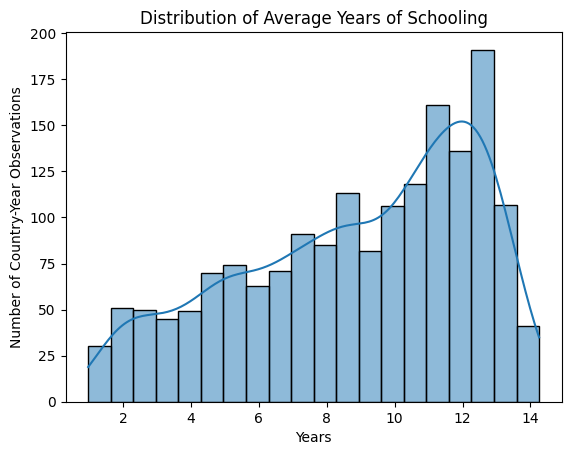

In [ ]:
sns.histplot(merged_df['Avg_Schooling'], kde=True, bins=20)
plt.title("Distribution of Average Years of Schooling")
plt.xlabel("Years")
plt.ylabel("Number of Country-Year Observations")
plt.show()


While a large portion of the world seems to be achieving moderate to high educational levels, the data still reflects structural inequalities. This uneven distribution may be a key factor moderating the relationship between women's empowerment and broader societal well-being.

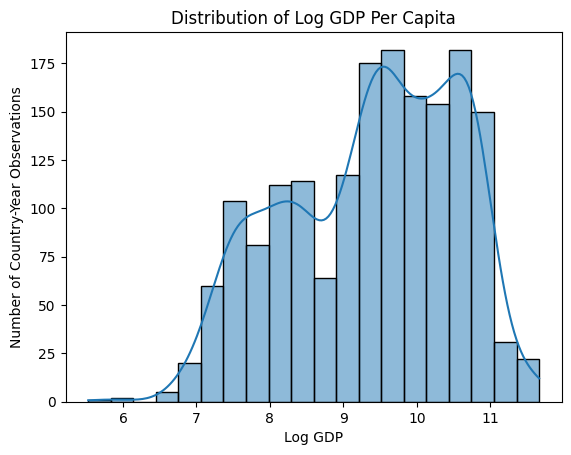

In [ ]:
sns.histplot(merged_df['GDP'], kde=True, bins=20)
plt.title("Distribution of Log GDP Per Capita")
plt.xlabel("Log GDP")
plt.ylabel("Number of Country-Year Observations")
plt.show()


The wide spread confirms global differences in economic conditions. Since economic well-being often influences national happiness, it will be important to control for GDP in later analyses when examining the relationship between women’s empowerment and well-being indicators.

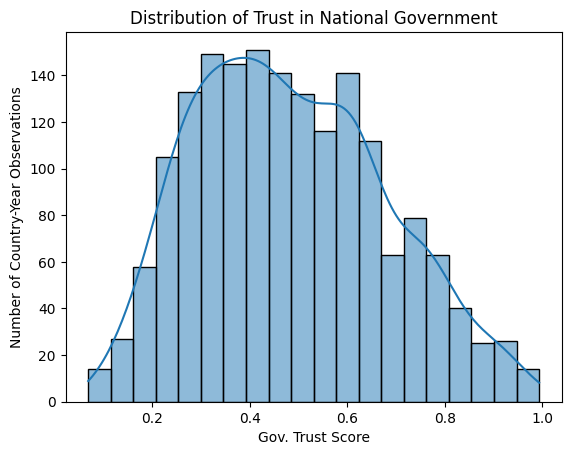

In [ ]:
sns.histplot(merged_df['Gov_Trust'], kde=True, bins=20)
plt.title("Distribution of Trust in National Government")
plt.xlabel("Gov. Trust Score")
plt.ylabel("Number of Country-Year Observations")
plt.show()


The distribution is approximately bell-shaped, peaking around 0.4 to 0.5, which indicates that moderate levels of trust are the most common. Exploring how this trust level correlates with empowerment, education, and GDP will be essential in later stages of the analysis.

**The histograms reveal that while women’s political participation is widely high, true empowerment is more unevenly distributed. Education and GDP show large global disparities, and trust in government tends to be moderate or low in most observations. These patterns suggest that national well-being is shaped by both structural and political factors, which will be explored further in the next steps.**

In [ ]:
merged_df["Emp_Group"] = pd.qcut(merged_df["Empowerment_Index"], q=2, labels=["Low", "High"])
# Categorize observations into two groups based on Empowerment Index.
# This will allow comparison of variables like trust or schooling across empowerment levels.

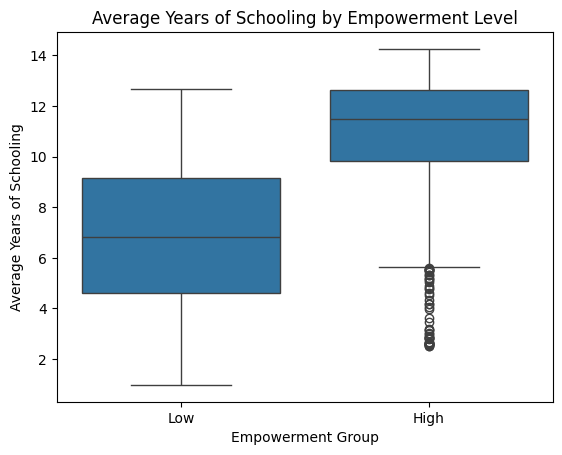

In [ ]:
sns.boxplot(data=merged_df, x="Emp_Group", y="Avg_Schooling")
plt.title("Average Years of Schooling by Empowerment Level")
plt.xlabel("Empowerment Group")
plt.ylabel("Average Years of Schooling")
plt.show()


This supports the idea that education plays a foundational role in fostering women’s political empowerment. Countries with higher schooling levels are more likely to empower women in meaningful political roles, reinforcing the link between education and women's empowerment level.

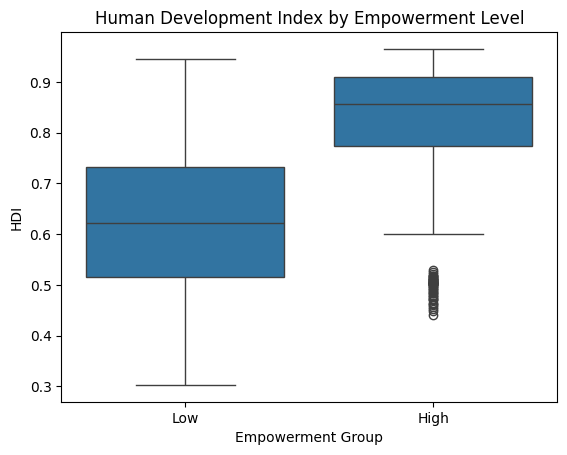

In [ ]:
sns.boxplot(data=merged_df, x="Emp_Group", y="HDI")
plt.title("Human Development Index by Empowerment Level")
plt.xlabel("Empowerment Group")
plt.ylabel("HDI")
plt.show()


This bar chart confirms a strong positive relationship between women’s political empowerment and national development. Countries that politically empower women tend to perform significantly better on core human development indicators, supporting the idea that empowering women contributes to overall well-being.

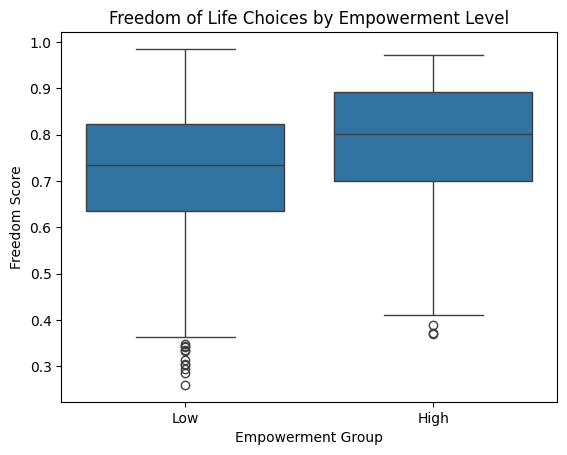

In [ ]:
sns.boxplot(data=merged_df, x="Emp_Group", y="Freedom")
plt.title("Freedom of Life Choices by Empowerment Level")
plt.xlabel("Empowerment Group")
plt.ylabel("Freedom Score")
plt.show()


This visual suggests that higher political empowerment of women is positively associated with perceived personal freedom in a society. The high empowerment group has a higher median freedom score, centered around 0.85, and most values lie within a narrower, upper range.

**The boxplots reveal consistent patterns supporting the idea that higher women's political empowerment is associated with better national well-being. Countries in the high empowerment group tend to have higher median values for education, human development, and freedom to make life choices.**

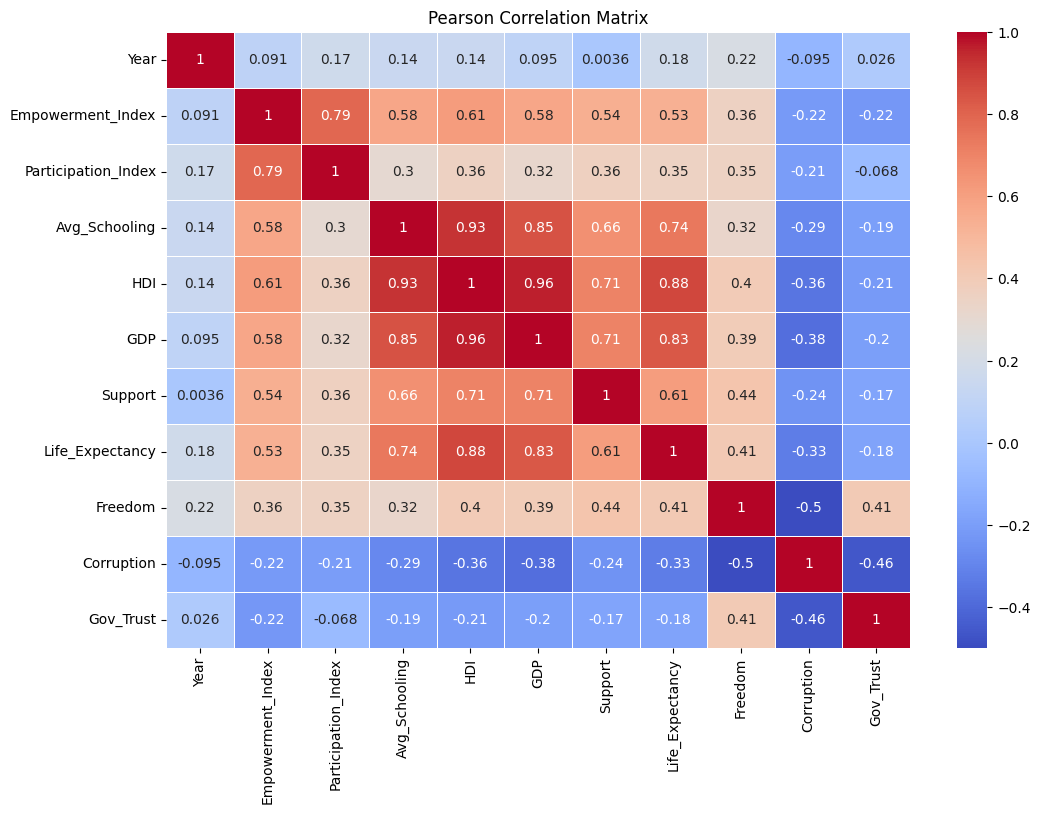

In [ ]:
# Create a correlation matrix for all numeric columns
corr_matrix = merged_df.corr(numeric_only=True)

# Plot it
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Pearson Correlation Matrix")
plt.show()


**Correlation Analysis Summary**

The pearson correlation matrix highlights several key relationships between women's political empowerment and national well-being indicators:

1- Empowerment has strong positive correlations with:



*   Participation Index (0.79)
*   Average Years of Schooling (0.58)

*   HDI (0.61) and GDP (0.58)


2- Empowerment has moderate positive correlations with:



*   Life Expectancy (0.53)

*   Freedom (0.36)

3- Empowerment has moderate negative correlations with:



*   Corruption (-0.22)

*   Government Trust (-0.22)





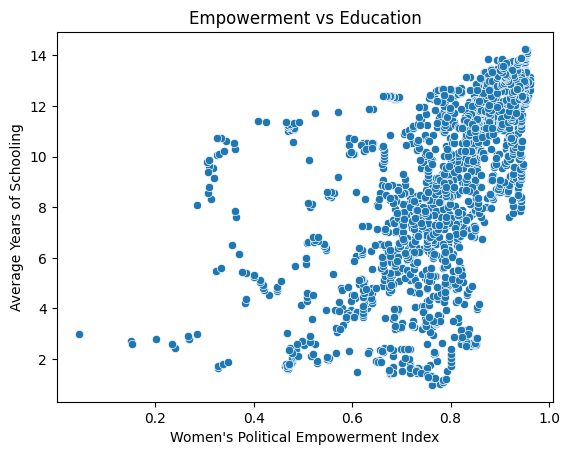

In [ ]:
sns.scatterplot(data=merged_df, x="Empowerment_Index", y="Avg_Schooling")
plt.title("Empowerment vs Education")
plt.xlabel("Women's Political Empowerment Index")
plt.ylabel("Average Years of Schooling")
plt.show()


Countries with higher women's empowerment levels tend to have significantly higher average years of schooling.This supports the idea that education is not just an outcome of development, but also a foundation for political inclusion and long-term women's empowerment.

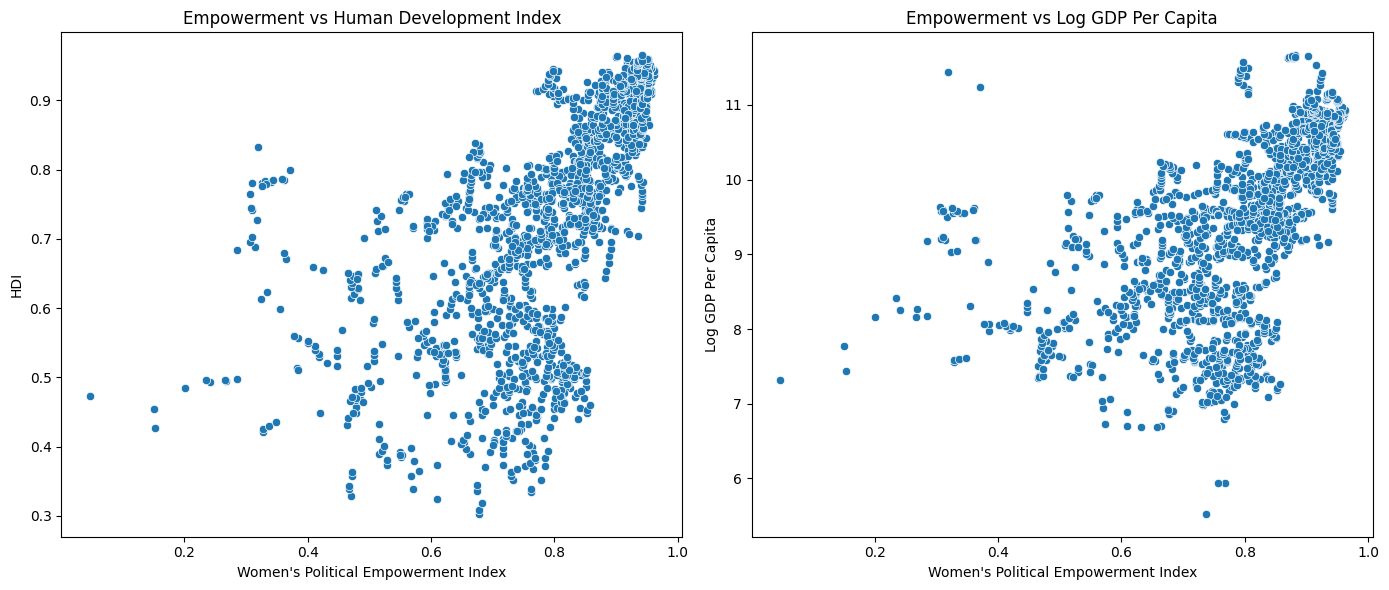

In [ ]:
# Set figure and axes
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot 1: Empowerment vs HDI
sns.scatterplot(ax=axes[0], data=merged_df, x="Empowerment_Index", y="HDI")
axes[0].set_title("Empowerment vs Human Development Index")
axes[0].set_xlabel("Women's Political Empowerment Index")
axes[0].set_ylabel("HDI")

# Plot 2: Empowerment vs GDP
sns.scatterplot(ax=axes[1], data=merged_df, x="Empowerment_Index", y="GDP")
axes[1].set_title("Empowerment vs Log GDP Per Capita")
axes[1].set_xlabel("Women's Political Empowerment Index")
axes[1].set_ylabel("Log GDP Per Capita")

plt.tight_layout()
plt.show()

Both HDI and GDP are strongly and positively correlated with empowerment. The scatter plots reveal that countries with more empowered women tend to be more economically prosperous and socially developed.

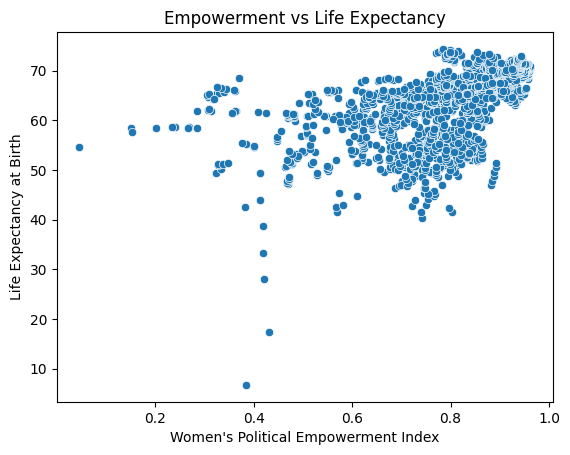

In [ ]:
sns.scatterplot(data=merged_df, x="Empowerment_Index", y="Life_Expectancy")
plt.title("Empowerment vs Life Expectancy")
plt.xlabel("Women's Political Empowerment Index")
plt.ylabel("Life Expectancy at Birth")
plt.show()


Life expectancy increases with women's empowerment, which may reflect better access to healthcare, stability, and long-term policy focus in more inclusive societies.

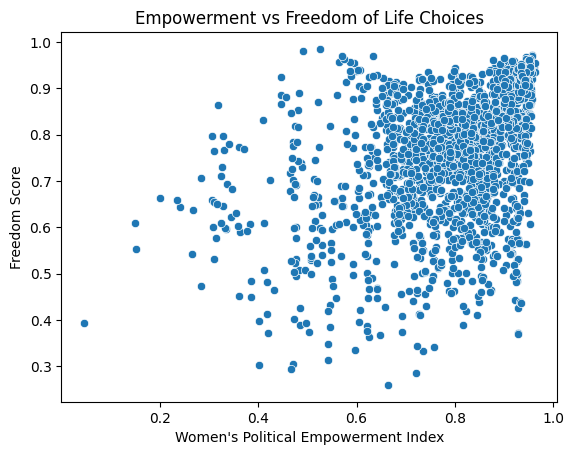

In [ ]:
sns.scatterplot(data=merged_df, x="Empowerment_Index", y="Freedom")
plt.title("Empowerment vs Freedom of Life Choices")
plt.xlabel("Women's Political Empowerment Index")
plt.ylabel("Freedom Score")
plt.show()


While the relationship is not as strong as the other indicators, there's a positive trend which suggests that political empowerment may also influence perceived personal freedom.

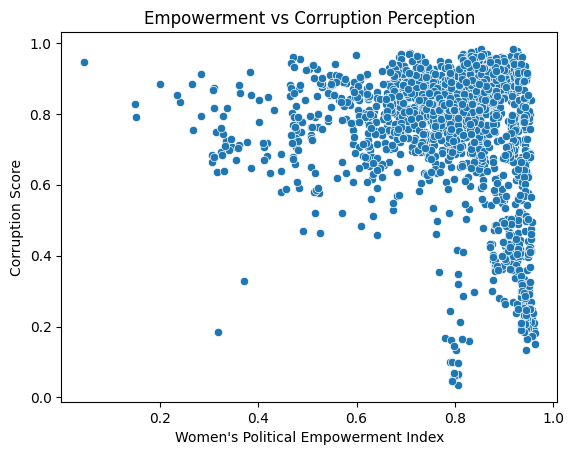

In [ ]:
sns.scatterplot(data=merged_df, x="Empowerment_Index", y="Corruption")
plt.title("Empowerment vs Corruption Perception")
plt.xlabel("Women's Political Empowerment Index")
plt.ylabel("Corruption Score")
plt.show()


The moderate negative trend indicates that more women's empowered countries tend to report lower levels of perceived corruption showing that as women's empowerment increases, perceived corruption tends to decrease, pointing to a healthier governance environment.



**Correlation analysis and scatter plots reveal that women's political empowerment is positively correlated with key development indicators such as education, HDI, and GDP. The visualizations show upward trends, confirming that countries with higher levels of women's empowerment tend to be more developed, educated, and economically stable. These relationships provide strong statistical and visual support for the idea that empowering women in politics contributes to broader national well-being.**


----------------------------------------------------------



**Hypotheses Testings**

1- For education:

H₀ (null hypothesis):
There is no difference in average schooling between high and low empowerment groups.

H₁ (alternative hypothesis):
There is a significant difference in average schooling between the two groups.


In [ ]:
from scipy.stats import ttest_ind

# Split data into high and low empowerment groups
low_group = merged_df[merged_df["Emp_Group"] == "Low"]["Avg_Schooling"]
high_group = merged_df[merged_df["Emp_Group"] == "High"]["Avg_Schooling"]

# Perform t-test
t_stat, p_val = ttest_ind(low_group, high_group, equal_var=False)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_val:.5f}")


T-statistic: -30.285
P-value: 0.00000


An independent samples t-test was conducted to determine whether the average years of schooling differs significantly between countries with low and high levels of women's political empowerment. The test yielded a t-statistic of -30.285 and a p-value < 0.005, which leds us to reject the null hypothesis and say there is a significant difference in average schooling between two groups.

-------------------------------------

2- for HDI


*   H₀ (Null): There is no difference in HDI between high and low empowerment groups.
*   H₁ (Alt): There is a significant difference in HDI between the two groups.




In [ ]:
# Extract HDI values
low_group = merged_df[merged_df["Emp_Group"] == "Low"]["HDI"]
high_group = merged_df[merged_df["Emp_Group"] == "High"]["HDI"]

# Sample means
mean_low = low_group.mean()
mean_high = high_group.mean()

# Standard deviation from full dataset (shared earlier)
std_pop = 0.16208  # population standard deviation for HDI that I previously found

# Sample sizes
n_low = len(low_group)
n_high = len(high_group)

# Z-statistic (for difference in means)
z = (mean_high - mean_low) / np.sqrt((std_pop**2 / n_low) + (std_pop**2 / n_high))

# Two-tailed test p-value
p_val = 2 * (1 - stats.norm.cdf(abs(z)))

print(f"Z-statistic: {z:.3f}")
print(f"P-value: {p_val:.5f}")


Z-statistic: 26.786
P-value: 0.00000


The result is highly statistically significant, allowing us to confidently reject the null hypothesis. Since the high empowerment group has a higher average HDI, we conclude that countries with greater political empowerment for women also tend to have significantly higher levels of human development.

## This phase of my project provides strong evidence that women's political empowerment is closely associated with higher national development and well-being. Through statistical testing and correlation analysis, I found that empowered countries tend to score higher in education, human development, and personal freedom. While happiness was measured indirectly, the results support the idea that empowering women in leadership creates broader societal benefits. These findings can guide future research and policy on inclusive governance.